In [1]:
!pip install --upgrade biopython nglview ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 33.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 35.6 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for nglview: filename=nglview-3.0.8-py3-none-any.whl size=10216160 sha256=e1fe3bde228290568ccda45794ddc45fc647debfac88ac3129fe598054c1e556
  Stored in directory: /home/onyxia/.cache/pip/wheels/2e/6c/59/32bf4aa0134f9c4cdca054f5192839fb4285241e2f17f7d358
Successfully built nglview


In [1]:
!wget https://alphafold.ebi.ac.uk/files/AF-P04637-F1-model_v4.cif

--2023-11-23 21:16:14--  https://alphafold.ebi.ac.uk/files/AF-P04637-F1-model_v4.cif
Resolving alphafold.ebi.ac.uk (alphafold.ebi.ac.uk)... 34.149.152.8
Connecting to alphafold.ebi.ac.uk (alphafold.ebi.ac.uk)|34.149.152.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘AF-P04637-F1-model_v4.cif’

AF-P04637-F1-model_     [ <=>                ] 351.36K  --.-KB/s    in 0.04s   

2023-11-23 21:16:15 (7.92 MB/s) - ‘AF-P04637-F1-model_v4.cif’ saved [359793]



In [1]:
import s3fs
import polars as pl
import os
from Bio.PDB import *
from random import randint
from time import sleep

import sys
sys.path.append('../')
from src.functions import import_s3_parquet

In [2]:


S3_ENDPOINT_URL = "https://" + os.environ["AWS_S3_ENDPOINT"]
fs = s3fs.S3FileSystem(client_kwargs={'endpoint_url': S3_ENDPOINT_URL})


data_path = "/home/onyxia/work/TDA_Protein3D/data/"
#with fs.open(FILE_PATH_OUT_S3, mode="rb") as file_in:
#    df = pl.read_parquet(file_in)

parquet_file = "KEGG_db/"
import_s3_parquet(parquet_file, data_path)
df = pl.read_parquet(data_path + "Tara_relevant_genes.parquet")  
df



Downloaded parquet files to /home/onyxia/work/TDA_Protein3D/data/


gene,OM-RGC_ID,KO,OG,GC,Domain,Phylum,Class,Order,Family,Genus,Species,Strain,sequence,Prot
str,str,str,str,str,str,str,str,str,str,str,str,str,str,bool
"""TARA_X00000036…","""OM-RGC.v2.0263…","""K03531""","""COG0206""",null,"""Bacteria""","""Proteobacteria…","""Alphaproteobac…","""Pelagibacteral…","""Pelagibacterac…",null,null,null,"""AACTTTAAAACACC…",false
"""TARA_X00000036…","""OM-RGC.v2.0263…","""K00147""","""COG0014""",null,"""Bacteria""","""Proteobacteria…","""Alphaproteobac…","""Pelagibacteral…","""Pelagibacterac…","""Candidatus Pel…",null,null,"""CCACTTGGCGTTAT…",false
"""TARA_X00000036…","""OM-RGC.v2.0263…","""K03545""","""COG0544""",null,"""Bacteria""","""Proteobacteria…","""Gammaproteobac…",null,null,null,null,null,"""AATATCATTCAGAG…",false
"""TARA_X00000036…","""OM-RGC.v2.0267…","""K01895""","""COG0365""",null,"""Bacteria""","""Proteobacteria…","""Alphaproteobac…",null,null,null,null,null,"""GAAACTTATTTTTC…",false
"""TARA_X00000036…","""OM-RGC.v2.0263…","""K01907""","""COG0365""",null,"""Bacteria""","""Proteobacteria…","""Alphaproteobac…","""Pelagibacteral…","""Pelagibacterac…","""Candidatus Pel…",null,null,"""AATCAAAAAGGGGA…",false
"""TARA_X00000036…","""OM-RGC.v2.0260…","""K00254""","""COG0167""",null,"""Bacteria""","""Proteobacteria…","""Alphaproteobac…","""Pelagibacteral…","""Pelagibacterac…","""Candidatus Pel…","""Candidatus Pel…",null,"""CTTAAACTTAATTT…",false
"""TARA_X00000036…","""OM-RGC.v2.0263…","""K00010""","""COG0673""",null,"""Bacteria""","""Proteobacteria…","""Alphaproteobac…","""Pelagibacteral…","""Pelagibacterac…",null,null,null,"""CCCGCTCCTCCTTC…",false
"""TARA_X00000036…","""OM-RGC.v2.0298…","""K00228""","""COG0408""",null,"""Bacteria""","""Proteobacteria…","""Alphaproteobac…","""Pelagibacteral…","""Pelagibacterac…","""Candidatus Pel…",null,null,"""GTATTAAGGATGAT…",false
"""TARA_X00000036…","""OM-RGC.v2.0263…","""K03336""","""COG3962""",null,"""Bacteria""","""Proteobacteria…","""Alphaproteobac…","""Pelagibacteral…","""Pelagibacterac…",null,null,null,"""TCTTTTAAAGCTGT…",false


Selecting only relevant KO's for TDA

In [3]:
with open("/home/onyxia/work/TDA_Protein3D/KO_shap.txt", "r") as ko_to_fetch:
    KO_s = ko_to_fetch.read().replace(" ", "").split('\n')
KO_s

len(KO_s) #18*30 -> cohérent


459

In [4]:
KO= set(KO_s)

In [5]:
len(KO)

459

In [6]:
KO

{'',
 'K00002',
 'K00003',
 'K00004',
 'K00005',
 'K00006',
 'K00008',
 'K00010',
 'K00027',
 'K00028',
 'K00033',
 'K00042',
 'K00057',
 'K00059',
 'K00060',
 'K00067',
 'K00113',
 'K00122',
 'K00128',
 'K00131',
 'K00145',
 'K00147',
 'K00156',
 'K00161',
 'K00162',
 'K00169',
 'K00170',
 'K00172',
 'K00208',
 'K00218',
 'K00228',
 'K00230',
 'K00236',
 'K00245',
 'K00246',
 'K00254',
 'K00274',
 'K00275',
 'K00303',
 'K00313',
 'K00320',
 'K00331',
 'K00363',
 'K00371',
 'K00392',
 'K00395',
 'K00412',
 'K00464',
 'K00474',
 'K00524',
 'K00547',
 'K00549',
 'K00554',
 'K00555',
 'K00557',
 'K00558',
 'K00565',
 'K00566',
 'K00567',
 'K00574',
 'K00575',
 'K00613',
 'K00631',
 'K00632',
 'K00639',
 'K00657',
 'K00661',
 'K00691',
 'K00698',
 'K00706',
 'K00822',
 'K00855',
 'K00922',
 'K00927',
 'K00940',
 'K00944',
 'K00950',
 'K00988',
 'K00997',
 'K00999',
 'K01029',
 'K01033',
 'K01056',
 'K01057',
 'K01060',
 'K01103',
 'K01126',
 'K01129',
 'K01146',
 'K01150',
 'K01151',
 'K01

In [2]:
df = pl.read_parquet("/home/onyxia/work/TDA_Protein3D/data/Tara_relevant_genes.parquet")
df

gene,OM-RGC_ID,KO,OG,GC,Domain,Phylum,Class,Order,Family,Genus,Species,Strain,sequence,Prot
str,str,str,str,str,str,str,str,str,str,str,str,str,str,bool
"""TARA_X00000036…","""OM-RGC.v2.0263…","""K03531""","""COG0206""",null,"""Bacteria""","""Proteobacteria…","""Alphaproteobac…","""Pelagibacteral…","""Pelagibacterac…",null,null,null,"""AACTTTAAAACACC…",false
"""TARA_X00000036…","""OM-RGC.v2.0263…","""K00147""","""COG0014""",null,"""Bacteria""","""Proteobacteria…","""Alphaproteobac…","""Pelagibacteral…","""Pelagibacterac…","""Candidatus Pel…",null,null,"""CCACTTGGCGTTAT…",false
"""TARA_X00000036…","""OM-RGC.v2.0263…","""K03545""","""COG0544""",null,"""Bacteria""","""Proteobacteria…","""Gammaproteobac…",null,null,null,null,null,"""AATATCATTCAGAG…",false
"""TARA_X00000036…","""OM-RGC.v2.0267…","""K01895""","""COG0365""",null,"""Bacteria""","""Proteobacteria…","""Alphaproteobac…",null,null,null,null,null,"""GAAACTTATTTTTC…",false
"""TARA_X00000036…","""OM-RGC.v2.0263…","""K01907""","""COG0365""",null,"""Bacteria""","""Proteobacteria…","""Alphaproteobac…","""Pelagibacteral…","""Pelagibacterac…","""Candidatus Pel…",null,null,"""AATCAAAAAGGGGA…",false
"""TARA_X00000036…","""OM-RGC.v2.0260…","""K00254""","""COG0167""",null,"""Bacteria""","""Proteobacteria…","""Alphaproteobac…","""Pelagibacteral…","""Pelagibacterac…","""Candidatus Pel…","""Candidatus Pel…",null,"""CTTAAACTTAATTT…",false
"""TARA_X00000036…","""OM-RGC.v2.0263…","""K00010""","""COG0673""",null,"""Bacteria""","""Proteobacteria…","""Alphaproteobac…","""Pelagibacteral…","""Pelagibacterac…",null,null,null,"""CCCGCTCCTCCTTC…",false
"""TARA_X00000036…","""OM-RGC.v2.0298…","""K00228""","""COG0408""",null,"""Bacteria""","""Proteobacteria…","""Alphaproteobac…","""Pelagibacteral…","""Pelagibacterac…","""Candidatus Pel…",null,null,"""GTATTAAGGATGAT…",false
"""TARA_X00000036…","""OM-RGC.v2.0263…","""K03336""","""COG3962""",null,"""Bacteria""","""Proteobacteria…","""Alphaproteobac…","""Pelagibacteral…","""Pelagibacterac…",null,null,null,"""TCTTTTAAAGCTGT…",false


Now we want to fetch the structures associated with each genes: we thus either need to query via the RNA sequence or via an external identifier we manage to retrieve via KEGG, UniProt, or any other famous database. Retrieving by such a way would allow us to verify that our gene is indeed a protein (and thus it makes sense to retrieve its 3D structure).

In [3]:
row_2 = df.filter(pl.col('Prot')== True)[2]

In [4]:
row_2.select(pl.col('sequence')).item() #for 1x1 case
sequence = df.filter(pl.col('Prot')== True).select(pl.col(['gene', 'sequence']))

In [5]:
seq2id = sequence.sort(pl.col('gene'))

In [6]:
seq2id.unique(subset='gene') #identifiant bien unique

gene,sequence
str,str
"""TARA_B10000057…","""ATGGCGAAAAAACA…"
"""TARA_B11000011…","""ATGAGTTATCCAGA…"
"""TARA_X00000095…","""ATGAAAAATAATAT…"
"""TARA_Y10000197…","""ATGAAACTATTAAC…"
"""TARA_Y10000196…","""ATGAAACCCAAATC…"
"""TARA_A10000101…","""ATGGAAAGAGACTT…"
"""TARA_B10000125…","""ATGAGTAATTTAAT…"
"""TARA_B10000042…","""ATGGGTAAAATAGC…"
"""TARA_B10000002…","""ATGAAGTTATTAAG…"


In [12]:
seq2id.row(1)
#TARA_X000000368_G_C22373007_1_gene425713

('TARA_A100000164_G_C21180810_1_gene440486',
 'ATGATTATTGAAAGAGATATGTGGCTAGTAAAAGCAACTAATTGCAAATATCATGTCAGTCATATTTCTACTAAAGAGTCTGTTGAGATAATAAGAAAAGCAAAAAAAAATAATCTTCCTGTGACATGTGACACGGCTCCTCCATATTTTACCCTTAATGAGTTATCACTTGAAAATTACAGAACCTTTTCAAAATTGTCACCCCCTCTTAGATCAGAGGAGGATAGACAAGAAATAATATCTGGTATTCAGGATGGTACAATTGATGCTATAGCATCAGATCATACTCCACATGACCAAGATGCTAAAAGACTTCCGTTTAATCAGGCAGATTTTGGTGGTATTGGATTAGAAACACTTTTACCAGTTACACTTAGCTTAGTTAAAAATAATAATATAAGTTTAATTAATGCGATTTCTCTTATTACCAAAAATCCCTCTGATATTTTTGATTTGGATACAGGAATTTTAAAACAAAATATTGAAGCGGATTTAATG')

In [24]:
#sequence.get_columns()
dico_seq = sequence.rows(named=True)

In [27]:
import ast
dico_seq
dico_seq = ast.literal_eval(dico_seq)

[{'gene': 'TARA_X000000368_G_C22372741_1_gene425585',
  'sequence': 'ATGCCTTATCATGAAAAAGTTTTAGATCATTATGAGAATCCAAGAAACGTAGGAAAGATGGATACTGAAGATTCGTCTGTTGGTACAGGCATGGTTGGGGCCCCAGCTTGTGGTGACGTGATGAGACTTCAAATTAAAATCAATGATGATGGAATTATTGAAGATGCAAAATTTAAAACATACGGTTGTGGGTCGGCTATTGCATCAAGTTCTCTCTTAACCGAGTGGGTGAAAGGTAAAAGTCTTGATGAGGCTGCAGAAATTAAAAATTCTGCTATAGCTGAAGAGCTAGCATTA'},
 {'gene': 'TARA_X000000368_G_C22373007_1_gene425713',
  'sequence': 'ATGTACGCAGTAATAAAAAGCGGTGGAAAGCAACATAAAGTTTCAGAAGGCGAGGAAATTCTTCTTGAAAAGATATCTTTAGGCGAAGGAGAAATAATAGAATTTTCAGAGGTTTTAGCTGTAAATAAAGATGGCACTTTAAACGTTGGAAAACCACTTTTAGAGGGAGCAGTCGTAAAGGGCAAGATAATAAATCACCTTAAGACAAAAAAAATCTCAGTTATAAAAATGAAAAGAAGAAAAGACTACAGAAAAAAACAAGGGCATAGGCAGAATTTAACAAAAGTAAAAATCGAATCTATAAGTTATGGCGCATAA'},
 {'gene': 'TARA_X000000368_G_C22373887_1_gene426101',
  'sequence': 'ATGTTAAAAAAATTTTTAGATAACTTTAATTTTTCGTATAAATTTAAAAGTTCAACTGAACTTTACAAATCTGGTTTTTTTAATTCCACACTACAAATTATTTTAGAAAATTATGATGGAATAATGAATATTATATTACCAACATTAGGAAAAGAACGTCAAAAAACTTA

### Requests to ESM datafold (direct fold prediction)

Un fichier PDB est constitué 

In [7]:
import requests

def fold_protein_sequence(sequence):
    url = "https://api.esmatlas.com/foldSequence/v1/pdb/"
    data = sequence
    
    headers = {
    'Content-Type': 'application/x-www-form-urlencoded',
}
    response = requests.post(url, headers = headers, data=data, verify=False)
    
    return response.text

# Example usage
protein_sequence = "GENGEIPLEIRATTGAEVDTRAVTAVEMTEGTLGIFRLPEEDYTALENFRYNRVAGENWKPASTVIYVGGTYARLCAYAPYNSVEFKNSSLKTEAGLTMQTYAAEKDMRFAVSGGDEVWKKTPTANFELKRAYARLVLSVVRDATYPNTCKITKAKIEAFTGNIITANTVDISTGTEGSGTQTPQYIHTVTTGLKDGFAIGLPQQTFSGGVVLTLTVDGMEYSVTIPANKLSTFVRGTKYIVSLAVKGGKLTLMSDKILIDKDWAEVQTGTGGSGDDYDTSFN"
result = fold_protein_sequence(protein_sequence)

result

def write_pdb_file(pdb_string, output_file):
    with open(output_file + '.pdb', 'w') as f:
        f.write(pdb_string)

# Example usage
input_string = result

output_filename = "/home/onyxia/work/TDA_Protein3D/data/test"
write_pdb_file(input_string, output_filename)


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [8]:
import re

def extract_numbers(file_path):
    with open(file_path, 'r') as file:
        content = file.read()

        # Find the pattern "1.00" followed by numbers between 0 and 1
        pattern = re.compile(r'1\.00(?:\s+|\D+)(0(?:\.\d+)?|1(?:\.0+)?)')
        matches = pattern.findall(content)

        # Extract the matched numbers
        numbers = [float(match) for match in matches]

    return numbers

# Replace 'your_file.txt' with the actual path to your text file
file_path = '/home/onyxia/work/TDA_Protein3D/data/test.pdb'
result = extract_numbers(file_path)

print("Numbers between 0 and 1 after '1.00':", result)


Numbers between 0 and 1 after '1.00': [0.54, 0.56, 0.58, 0.57, 0.71, 0.72, 0.72, 0.65, 0.67, 0.62, 0.62, 0.7, 0.69, 0.76, 0.77, 0.77, 0.71, 0.73, 0.67, 0.63, 0.65, 0.81, 0.81, 0.81, 0.79, 0.81, 0.82, 0.83, 0.79, 0.82, 0.74, 0.72, 0.72, 0.69, 0.84, 0.85, 0.86, 0.83, 0.85, 0.75, 0.74, 0.72, 0.86, 0.87, 0.88, 0.86, 0.88, 0.85, 0.85, 0.87, 0.88, 0.88, 0.87, 0.88, 0.85, 0.82, 0.82, 0.9, 0.91, 0.91, 0.89, 0.91, 0.79, 0.76, 0.76, 0.72, 0.91, 0.92, 0.91, 0.91, 0.9, 0.86, 0.86, 0.83, 0.91, 0.91, 0.9, 0.89, 0.89, 0.84, 0.82, 0.8, 0.71, 0.67, 0.77, 0.9, 0.9, 0.89, 0.89, 0.87, 0.88, 0.87, 0.86, 0.86, 0.84, 0.81, 0.83, 0.84, 0.83, 0.82, 0.82, 0.79, 0.75, 0.76, 0.76, 0.74, 0.74, 0.69, 0.63, 0.62, 0.63, 0.59, 0.6, 0.59, 0.58, 0.58, 0.54, 0.55, 0.51, 0.53, 0.57, 0.49, 0.52, 0.54, 0.54, 0.48, 0.52, 0.41, 0.42, 0.51, 0.53, 0.52, 0.45, 0.5, 0.43, 0.45, 0.49, 0.55, 0.57, 0.56, 0.48, 0.53, 0.38, 0.47, 0.63, 0.64, 0.62, 0.57, 0.58, 0.53, 0.55, 0.41, 0.32, 0.28, 0.48, 0.65, 0.66, 0.65, 0.59, 0.61, 0.64, 0.65

In [9]:
import numpy as np
np.mean(result)

0.7311988847583643

Un fichier .pdb est constitué de différentes colonnes, avant celles-ci on peut lire les REMARK, indiquant l'article ou l'étude d'où sont issues les données.

In [221]:
print(result)

[0.54, 0.56, 0.58, 0.57, 0.71, 0.72, 0.72, 0.65, 0.67, 0.62, 0.62, 0.7, 0.69, 0.76, 0.77, 0.77, 0.71, 0.73, 0.67, 0.63, 0.65, 0.81, 0.81, 0.81, 0.79, 0.81, 0.82, 0.83, 0.79, 0.82, 0.74, 0.72, 0.72, 0.69, 0.84, 0.85, 0.86, 0.83, 0.85, 0.75, 0.74, 0.72, 0.86, 0.87, 0.88, 0.86, 0.88, 0.85, 0.85, 0.87, 0.88, 0.88, 0.87, 0.88, 0.85, 0.82, 0.82, 0.9, 0.91, 0.91, 0.89, 0.91, 0.79, 0.76, 0.76, 0.72, 0.91, 0.92, 0.91, 0.91, 0.9, 0.86, 0.86, 0.83, 0.91, 0.91, 0.9, 0.89, 0.89, 0.84, 0.82, 0.8, 0.71, 0.67, 0.77, 0.9, 0.9, 0.89, 0.89, 0.87, 0.88, 0.87, 0.86, 0.86, 0.84, 0.81, 0.83, 0.84, 0.83, 0.82, 0.82, 0.79, 0.75, 0.76, 0.76, 0.74, 0.74, 0.69, 0.63, 0.62, 0.63, 0.59, 0.6, 0.59, 0.58, 0.58, 0.54, 0.55, 0.51, 0.53, 0.57, 0.49, 0.52, 0.54, 0.54, 0.48, 0.52, 0.41, 0.42, 0.51, 0.53, 0.52, 0.45, 0.5, 0.43, 0.45, 0.49, 0.55, 0.57, 0.56, 0.48, 0.53, 0.38, 0.47, 0.63, 0.64, 0.62, 0.57, 0.58, 0.53, 0.55, 0.41, 0.32, 0.28, 0.48, 0.65, 0.66, 0.65, 0.59, 0.61, 0.64, 0.65, 0.64, 0.6, 0.62, 0.5, 0.51, 0.71, 0.

In [12]:
### Checking if average pLDDT matches with global one

In [62]:
mcgnify_id = "MGYP002537940442"
protein_sequence = "GENGEIPLEIRATTGAEVDTRAVTAVEMTEGTLGIFRLPEEDYTALENFRYNRVAGENWKPASTVIYVGGTYARLCAYAPYNSVEFKNSSLKTEAGLTMQTYAAEKDMRFAVSGGDEVWKKTPTANFELKRAYARLVLSVVRDATYPNTCKITKAKIEAFTGNIITANTVDISTGTEGSGTQTPQYIHTVTTGLKDGFAIGLPQQTFSGGVVLTLTVDGMEYSVTIPANKLSTFVRGTKYIVSLAVKGGKLTLMSDKILIDKDWAEVQTGTGGSGDDYDTSFN"

In [63]:
#fetch the predicted structure
result = fold_protein_sequence(protein_sequence) #from sequence
write_pdb_file(result, "from_seq")

/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [64]:
mc_gnify_result = response = requests.get(f'https://api.esmatlas.com/fetchPredictedStructure/{mcgnify_id}', verify=False)#from id
mc_gnify_result = mc_gnify_result.text
write_pdb_file(mc_gnify_result, "from_id")

/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [10]:
import re

def extract_numbers(file_path):
    with open(file_path, 'r') as file:
        content = file.read()

        # Find the pattern "1.00" followed by numbers between 0 and 1
        pattern = re.compile(r'1\.00(?:\s+|\D+)(0(?:\.\d+)?|1(?:\.0+)?)')
        matches = pattern.findall(content)

        # Extract the matched numbers
        numbers = [float(match) for match in matches]

    return numbers

In [10]:
import statistics
#computes average B factor

B_Factor  = extract_numbers("from_id")
seq_plDDT = statistics.fmean(B_Factor)

#fetch true pLDDT

true_conf = requests.get(f'https://api.esmatlas.com/fetchConfidencePrediction/{mcgnify_id}', verify=False)
dico = ast.literal_eval(true_conf.text)
id_plddt = statistics.fmean(dico['plddt'])

FileNotFoundError: [Errno 2] No such file or directory: 'from_id'

In [67]:
print(seq_plDDT, id_plddt)

0.745418215613383 0.7684098939929329


In [ ]:
#extract correspondence between tara_id and seq in a dataframe, order by tara ids ; extract the sequence lists (ordered aswell by tara_ids)
#create a dict with ordered tara_ids and iterate over it to name the .pdb files

In [12]:
import pandas as pd
import polars as pl

metadata = pd.DataFrame({'Tara_ID': pd.Series(dtype='str'),
                       'Avg_pLDDT': pd.Series(dtype='float')})

metadata = pl.DataFrame(metadata)
metadata_path = "/home/onyxia/work/TDA_Protein3D/data/metadata.parquet"
#metadata.write_parquet(metadata_path)
metadata = pl.read_parquet(metadata_path)
metadata

Tara_ID,Avg_pLDDT
str,f64


In [13]:
from Bio.Seq import Seq

seq2id = seq2id.with_columns(pl.col('sequence').apply(lambda x: str(Seq(x).translate(stop_symbol=''))))
seq2id = seq2id.with_columns(pl.col("sequence").str.len_bytes().alias("len_prot"))

/tmp/ipykernel_10889/15223496.py:3: DeprecationWarning: `apply` is deprecated. It has been renamed to `map_elements`.
  seq2id = seq2id.with_columns(pl.col('sequence').apply(lambda x: str(Seq(x).translate(stop_symbol=''))))


In [225]:
seq2id.select(pl.col('sequence'))[-1].item()

'MQKLDDIDRKILDILIDNTRTPFTDIAKRLLISPGTVHVRVKKMEDLAIIKGSSLTLDYKKLGYNFIAYVGILIDRSRRTYEIIEELKNKPHVTVAHITTGKYNIFCKIRAKGTEHARDIIFSIDDIEGVLRTETMISLEESINDKKRLMKNIFQDL'

In [141]:
#'MQKLDDIDRKILDILIDNTRTPFTDIAKRLLISPGTVHVRVKKMEDLAIIKGSSLTLDYKKLGYNFIAYVGILIDRSRRTYEIIEELKNKPHVTVAHITTGKYNIFCKIRAKGTEHARDIIFSIDDIEGVLRTETMISLEESINDKKRLMKNIFQDL*'
#'MQKLDDIDRKILDILIDNTRTPFTDIAKRLLISPGTVHVRVKKMEDLAIIKGSSLTLDYKKLGYNFIAYVGILIDRSRRTYEIIEELKNKPHVTVAHITTGKYNIFCKIRAKGTEHARDIIFSIDDIEGVLRTETMISLEESINDKKRLMKNIFQDL'

In [148]:
len(seq2id.row(-2)[1])

752

In [227]:
lengths = seq2id.select(pl.col('len_prot')).rows()
lengths = [elem[0] for elem in lengths]

In [228]:
import heapq
heapq.nlargest(10, lengths)


[5156, 3992, 1808, 1799, 1798, 1795, 1793, 1788, 1785, 1784]

In [229]:
#lengths.remove(5157)
lengths.remove(3992)

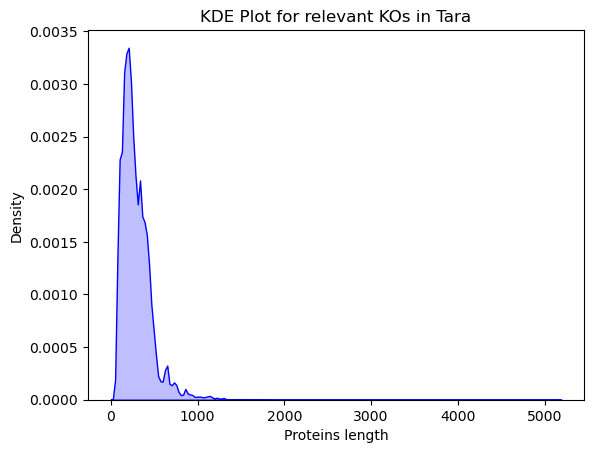

In [230]:
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sns

sns.kdeplot(lengths, fill=True, color='blue')

# Add labels and title
plt.xlabel('Proteins length')
plt.ylabel('Density')
plt.title('KDE Plot of length density for relevant KOs in TaraOcean micro-organisms data')

# Show the plot
plt.show()


In [231]:
sum(i > 400 for i in lengths)


97585

In [14]:
small_prots = seq2id.filter(pl.col('len_prot')<=400)
small_prots = small_prots.drop('len_prot')

In [18]:
small_prots = seq2id.filter(pl.col('len_prot')<=400)
small_prots = small_prots.drop('len_prot')
metada = pl.read_parquet(metadata_path)
length = small_prots.shape[0] - metada.shape[0]
missing_3D = small_prots.tail(length+1)

In [23]:
small_prots.shape[0]

405384

In [25]:
missing_3D.shape[0]

405384

In [237]:
missing_3D.row(0)

#TARA_A100000171_G_C2064476_1_gene111598

('TARA_A100000164_G_C21194030_1_gene446341',
 'MAKLSSINKNNKRIKLSNKFYKKRTALKKIIMNKQLSFEERFKAQQKLSNLPRNSAQIRVRNRCQITGRPHGVYRKLKISRIALR')

In [26]:
import statistics

def fetching_and_writing_3D(prot_seq : str, tara_id : str, folder_path : str, meta_parquet_path : str):
    """
    Args:
        - prot_seq: protein sequence
        - tara_id: tara_ocean_id of the gene

        - folder_path: path where structure is saved
        - meta_parquet_path: path where metadata parquet file stored (pLDDT of the predicted structure linked with TaraID)


    fc: predicts structure of a prot seq using ESMFold API (if length under 400), writes .pdb file, stores confidence prediction in a metadata parquet file
    """

    #predicts structure
    struct = fold_protein_sequence(prot_seq)

    while struct[0:5] == '{"mes':
        sleep(180)
        struct = fold_protein_sequence(prot_seq)
        pdb_path = folder_path + tara_id
        write_pdb_file(struct, pdb_path)

    #saves structure
    pdb_path = folder_path + tara_id
    write_pdb_file(struct, pdb_path)

    print('Structure saved')
    
    #computes average confidence
    indiv_pLDDT = extract_numbers(pdb_path + '.pdb')
    avg_plddt = statistics.fmean(indiv_pLDDT)
             
    #stores metadata
    new_row = pl.DataFrame({'Tara_ID' : tara_id , 'Avg_pLDDT' : avg_plddt})
    metadata = pl.read_parquet(meta_parquet_path)
    metadata = metadata.extend(new_row)
    metadata.write_parquet(meta_parquet_path)
    

    print('Metadata added')
    

    

In [32]:
missing_3D.row(1)[1]

'MPEMLKGKKGIILGVANERSIAWGIAKVLSEQGAELAFTYQTDGFGKRVLPLAESVNAKIVVPVDVQNESSINDLYNEVQKNWSKMDFFVHAIAYSDKEELTGRFINTSKRNFLNS'

In [34]:
#authorized_AA = ['R', 'Z', 'W', 'N', 'K', 'S', 'G', 'I', 'P', 'E', 'T', 'Q', 'C', 'Y', 'H', 'F', 'V', 'A', 'X', 'D', 'B', 'L', 'J', 'M']
#for i in range(405378):
#    AAs = set(list(missing_3D.row(i)[1]))
#    illegal_tokens = [i for i in AAs if i not in authorized_AA]
#
#    if len(illegal_tokens)>0:
#        print(illegal_tokens, i)

In [273]:
set(list(missing_3D.row(1)[1]))

{'A',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'K',
 'L',
 'M',
 'N',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'V',
 'W',
 'Y'}

In [27]:
folder_path_3D = "/home/onyxia/work/TDA_Protein3D/data/prot_struct/"
metadata_path = "/home/onyxia/work/TDA_Protein3D/data/metadata.parquet"

for i, row in enumerate(missing_3D.rows(named=True)):
    
    seq = row['sequence']
    id = row['gene']
    fetching_and_writing_3D(seq, id, folder_path_3D, metadata_path)
    
    print(id)

/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21180070_1_gene440187


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21180810_1_gene440486


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21186698_1_gene443106


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21188758_1_gene444027


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21193702_1_gene446189


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21193808_1_gene446243


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21194030_1_gene446341


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21197910_1_gene448127


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21201162_1_gene449477


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21201874_1_gene449806


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21204400_1_gene450966


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21207834_1_gene452476


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21209424_1_gene453133


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21210174_1_gene453464


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21211846_1_gene454222


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21218790_1_gene457229


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21222222_1_gene458845


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21226124_1_gene460505


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21231148_1_gene462755


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21231588_1_gene462953


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21235426_1_gene464540


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21235618_1_gene464615


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21236784_1_gene465127


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21237240_1_gene465331


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21239903_1_gene466581


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21241451_1_gene467290


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21242165_1_gene467556


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21242913_1_gene467861


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21243269_1_gene467993


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21243389_1_gene468047


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21245287_1_gene468845


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21246801_1_gene469557


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21247025_1_gene469668


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21247657_1_gene469959


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21247835_1_gene470019


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21250593_1_gene471197


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21251509_1_gene471549


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21252491_1_gene471945


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21256235_1_gene473642


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21256671_1_gene473851


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21257061_1_gene474026


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21257473_1_gene474222


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21259065_1_gene474894


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21261601_1_gene475991


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21267531_1_gene478633


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21269135_1_gene479347


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21270517_1_gene479980


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21270891_1_gene480146


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21272821_1_gene480997


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21274139_1_gene481550


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21276505_1_gene482562


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21277257_1_gene482906


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21282543_1_gene485244


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21283903_1_gene485776


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21286147_1_gene486804


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21286811_1_gene487097


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21286825_1_gene487103


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21288731_1_gene487985


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21290781_1_gene488861


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21292411_1_gene489510


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21293351_1_gene489935


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21294031_1_gene490257


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21296819_1_gene491497


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21298867_1_gene492346


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21298987_1_gene492399


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21300649_1_gene493138


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21301869_1_gene493685


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21303843_1_gene494593


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21306135_1_gene495556


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21306245_1_gene495593


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21306521_1_gene495710


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21307969_1_gene496345


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21314063_1_gene499004


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21318225_1_gene500920


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21321485_1_gene502271


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21321687_1_gene502369


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21324257_1_gene503509


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21324625_1_gene503689


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21327071_1_gene504694


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21330705_1_gene506415


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21332143_1_gene507063


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21340335_1_gene510680


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21341593_1_gene511238


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21347227_1_gene513689


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21348763_1_gene514334


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21355631_1_gene517348


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21358965_1_gene518885


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21360177_1_gene519418


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21360189_1_gene519421


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21360465_1_gene519536


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21362405_1_gene520387


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21364731_1_gene521450


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21364805_1_gene521482


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21365225_1_gene521662


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21365663_1_gene521843


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21370661_1_gene524036


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21372129_1_gene524640


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21375513_1_gene526167


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21375599_1_gene526209


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21375685_1_gene526249


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21376555_1_gene526656


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21376737_1_gene526749


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21378099_1_gene527351


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21378977_1_gene527717


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21379229_1_gene527825


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21379803_1_gene528087


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21380649_1_gene528454


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21382447_1_gene529276


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21383345_1_gene529693


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21384405_1_gene530140


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21387377_1_gene531547


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21387935_1_gene531809


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21388863_1_gene532241


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21388977_1_gene532300


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21389947_1_gene532687


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21390637_1_gene532993


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21394841_1_gene534951


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21395623_1_gene535309


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21397869_1_gene536314


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21398747_1_gene536717


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21400823_1_gene537659


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21400911_1_gene537692


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21402833_1_gene538453


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21403451_1_gene538749


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21405721_1_gene539847


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21406799_1_gene540335


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21407095_1_gene540444


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21407867_1_gene540750


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21409357_1_gene541404


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21410535_1_gene541939


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21410979_1_gene542146


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21411239_1_gene542267


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21412777_1_gene542929


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21414111_1_gene543543


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21414317_1_gene543633


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21416947_1_gene544872


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21417109_1_gene544940


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21417813_1_gene545224


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21418975_1_gene545742


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21420343_1_gene546361


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21422071_1_gene547145


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21422105_1_gene547164


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21422437_1_gene547308


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21423119_1_gene547582


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21425727_1_gene548695


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21425777_1_gene548720


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21426093_1_gene548864


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21426417_1_gene549020


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21428811_1_gene550087


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21431281_1_gene551194


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21431951_1_gene551491


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21433297_1_gene552068


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21436145_1_gene553301


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21436391_1_gene553412


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21436757_1_gene553606


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21436827_1_gene553631


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21437071_1_gene553735


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21438787_1_gene554468


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21440417_1_gene555182


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21441121_1_gene555520


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21443063_1_gene556422


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21443215_1_gene556505


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21444391_1_gene557021


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21445087_1_gene557338


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21445689_1_gene557635


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21445785_1_gene557685


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21448017_1_gene558706


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21449883_1_gene559500


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21450783_1_gene559918


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21451539_1_gene560270


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21454209_1_gene561472


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21457205_1_gene562828


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21460181_1_gene564143


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21463415_1_gene565630


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21465259_1_gene566429


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21466951_1_gene567169


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21467355_1_gene567367


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21470007_1_gene568511


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21470675_1_gene568814


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21471375_1_gene569143


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21472529_1_gene569670


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21472859_1_gene569810


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21473461_1_gene570047


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21474841_1_gene570626


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21475211_1_gene570816


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21475951_1_gene571169


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21477535_1_gene571870


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21477647_1_gene571924


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21477827_1_gene572006


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21478839_1_gene572423


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21479215_1_gene572605


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21480333_1_gene573109


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21482141_1_gene573898


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21482973_1_gene574291


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21484437_1_gene574987


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21485655_1_gene575547


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21485791_1_gene575622


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21487439_1_gene576322


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21488895_1_gene576981


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21490523_1_gene577747


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21490633_1_gene577788


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21494097_1_gene579330


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21496035_1_gene580207


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21496157_1_gene580260


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21497937_1_gene581063


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21499081_1_gene581617


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21501843_1_gene582819


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21504175_1_gene583910


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21506325_1_gene584895


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21507851_1_gene585587


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21508491_1_gene585843


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21508607_1_gene585897


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21508703_1_gene585938


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21510567_1_gene586787


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21513521_1_gene588117


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21513613_1_gene588156


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21513697_1_gene588196


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21513873_1_gene588283


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21515735_1_gene589162


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21516169_1_gene589342


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21516311_1_gene589400


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21520307_1_gene591173


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21520523_1_gene591265


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21524129_1_gene592889


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21524291_1_gene592950


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21524347_1_gene592977


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21525183_1_gene593348


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21527631_1_gene594502


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21531011_1_gene596016


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21532337_1_gene596580


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21535077_1_gene597814


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21535107_1_gene597828


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21535285_1_gene597903


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21536407_1_gene598400


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21536691_1_gene598534


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21536867_1_gene598610


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21536975_1_gene598666


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21538359_1_gene599289


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21538491_1_gene599358


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21538825_1_gene599501


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21539267_1_gene599703


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21540515_1_gene600245


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21541709_1_gene600831


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21542993_1_gene601407


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21543731_1_gene601702


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21543817_1_gene601744


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21544701_1_gene602141


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21544851_1_gene602218


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21545089_1_gene602362


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21547777_1_gene603596


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21547963_1_gene603676


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21548307_1_gene603850


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21551449_1_gene605251


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21553739_1_gene606323


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21554457_1_gene606626


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21554655_1_gene606716


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21555849_1_gene607243


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21560017_1_gene609074


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21561479_1_gene609702


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21561557_1_gene609743


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21563491_1_gene610649


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21563675_1_gene610734


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21564209_1_gene610965


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21564321_1_gene611014


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21565411_1_gene611471


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21565633_1_gene611574


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21565991_1_gene611737


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21569159_1_gene613149


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21569937_1_gene613504


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21570599_1_gene613824


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21572159_1_gene614506


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21575747_1_gene616144


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21578473_1_gene617368


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21578883_1_gene617558


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21579907_1_gene618007


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21579981_1_gene618036


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21580001_1_gene618048


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21581365_1_gene618622


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21582457_1_gene619138


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21582793_1_gene619282


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21585347_1_gene620404


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21587121_1_gene621217


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21587227_1_gene621250


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21587599_1_gene621415


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21590343_1_gene622617


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21592407_1_gene623522


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21593509_1_gene624001


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21594237_1_gene624340


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21595323_1_gene624860


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21595435_1_gene624924


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21595697_1_gene625046


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21596473_1_gene625391


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21599049_1_gene626625


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21599871_1_gene626978


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21599957_1_gene627023


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21600145_1_gene627111


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21601411_1_gene627697


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21602247_1_gene628058


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21602251_1_gene628060


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21603105_1_gene628449


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21603129_1_gene628458


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21603183_1_gene628487


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21603329_1_gene628560


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21603821_1_gene628802


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21603947_1_gene628854


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21605351_1_gene629509


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21605677_1_gene629654


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21606703_1_gene630131


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21607303_1_gene630434


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21607411_1_gene630480


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21607947_1_gene630708


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21607991_1_gene630720


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21608911_1_gene631138


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21609381_1_gene631363


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21611073_1_gene632139


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21611327_1_gene632264


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21611451_1_gene632324


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21612399_1_gene632742


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21613701_1_gene633321


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21614065_1_gene633510


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21614665_1_gene633778


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21614999_1_gene633944


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21615049_1_gene633967


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21615055_1_gene633970


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21619909_1_gene636065


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21620299_1_gene636246


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21620649_1_gene636415


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21622829_1_gene637436


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21622999_1_gene637513


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21623021_1_gene637521


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21623131_1_gene637580


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21623701_1_gene637839


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21624931_1_gene638364


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21628503_1_gene640035


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21631137_1_gene641285


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21631565_1_gene641490


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21632027_1_gene641701


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21632835_1_gene642068


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21633233_1_gene642250


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21634857_1_gene642982


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21635843_1_gene643421


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21636857_1_gene643923


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21638095_1_gene644501


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21640803_1_gene645697


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21643451_1_gene646918


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21643877_1_gene647113


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21644197_1_gene647277


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21646127_1_gene648133


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21649851_1_gene649823


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21650189_1_gene649959


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21650521_1_gene650106


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21650593_1_gene650140


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21651479_1_gene650518


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21651941_1_gene650700


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21652185_1_gene650807


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21652565_1_gene650989


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21653359_1_gene651370


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21653995_1_gene651661


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21654511_1_gene651897


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21655145_1_gene652203


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21656165_1_gene652702


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21657509_1_gene653339


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21657967_1_gene653542


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21658651_1_gene653833


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21659179_1_gene654090


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21659543_1_gene654275


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21659563_1_gene654285


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21664037_1_gene656328


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21664071_1_gene656348


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21664215_1_gene656425


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21666361_1_gene657421


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21667419_1_gene657912


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21667479_1_gene657942


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21667665_1_gene658015


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21668829_1_gene658575


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21669209_1_gene658763


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21670393_1_gene659304


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21670967_1_gene659578


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21671395_1_gene659762


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21671635_1_gene659890


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21672879_1_gene660504


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21674009_1_gene661025


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21674381_1_gene661224


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21674601_1_gene661326


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21674855_1_gene661439


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21675863_1_gene661907


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21676143_1_gene662035


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21676449_1_gene662182


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21676915_1_gene662427


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21679569_1_gene663656


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21681587_1_gene664584


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21684535_1_gene665959


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21685975_1_gene666642


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21685977_1_gene666644


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21686385_1_gene666855


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21687147_1_gene667181


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21688655_1_gene667883


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21689043_1_gene668073


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21689265_1_gene668154


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21689715_1_gene668357


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21690577_1_gene668756


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21692091_1_gene669441


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21692913_1_gene669803


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21693873_1_gene670262


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21695767_1_gene671152


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21696993_1_gene671704


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21698221_1_gene672219


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21698701_1_gene672475


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21699493_1_gene672836


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21701303_1_gene673696


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21701565_1_gene673815


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21702689_1_gene674354


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21703027_1_gene674510


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21703131_1_gene674559


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21703181_1_gene674583


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21703339_1_gene674658


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21703971_1_gene674941


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21704403_1_gene675143


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21705227_1_gene675510


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21706679_1_gene676143


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21707471_1_gene676526


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21707999_1_gene676757


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21709137_1_gene677331


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21709301_1_gene677412


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21710333_1_gene677888


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21711421_1_gene678409


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21712559_1_gene678943


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21714033_1_gene679642


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21714227_1_gene679725


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21714893_1_gene680018


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21714937_1_gene680044


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21715413_1_gene680271


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21716523_1_gene680783


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21716679_1_gene680841


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21717445_1_gene681190


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21717491_1_gene681206


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21718587_1_gene681731


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21718591_1_gene681733


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21718937_1_gene681880


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21719057_1_gene681952


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21720703_1_gene682762


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21722423_1_gene683581


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21722451_1_gene683592


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21723185_1_gene683937


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21723455_1_gene684055


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21724155_1_gene684397


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21724897_1_gene684718


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21725325_1_gene684930


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21725397_1_gene684954


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21726605_1_gene685503


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21727161_1_gene685769


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21728975_1_gene686589


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21729651_1_gene686933


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21731583_1_gene687831


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21732047_1_gene688059


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21732881_1_gene688464


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21734007_1_gene689006


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21734135_1_gene689073


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21734791_1_gene689399


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21734851_1_gene689425


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21735193_1_gene689577


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21735863_1_gene689898


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21736395_1_gene690128


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21737851_1_gene690832


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21737999_1_gene690900


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21738485_1_gene691117


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21738597_1_gene691174


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21739065_1_gene691383


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21739319_1_gene691509


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21739649_1_gene691686


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21740681_1_gene692123


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21741733_1_gene692616


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21742301_1_gene692895


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21742903_1_gene693176


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21743201_1_gene693329


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21743277_1_gene693369


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21743507_1_gene693486


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21743527_1_gene693494


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21743685_1_gene693571


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21744155_1_gene693784


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21744207_1_gene693806


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21744427_1_gene693887


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21744723_1_gene694023


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21745603_1_gene694459


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21747993_1_gene695604


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21749015_1_gene696069


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21749343_1_gene696232


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21750499_1_gene696773


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21750739_1_gene696878


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21750987_1_gene697003


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21751151_1_gene697070


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21752553_1_gene697688


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21754565_1_gene698639


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21754763_1_gene698739


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21754823_1_gene698768


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21755003_1_gene698848


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21755029_1_gene698857


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21757105_1_gene699793


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21757359_1_gene699908


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21757489_1_gene699966


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21757553_1_gene700001


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21758567_1_gene700437


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21758597_1_gene700453


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21758883_1_gene700590


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21759413_1_gene700840


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21759973_1_gene701119


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21760305_1_gene701254


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21760553_1_gene701380


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21760929_1_gene701534


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21761663_1_gene701893


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21761861_1_gene701987


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21762513_1_gene702289


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21763167_1_gene702591


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21763331_1_gene702676


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21763657_1_gene702858


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21763735_1_gene702889


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21764525_1_gene703249


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21764567_1_gene703274


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21764863_1_gene703423


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21766455_1_gene704188


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21767017_1_gene704488


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21767191_1_gene704577


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21768133_1_gene705030


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21768255_1_gene705078


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21769323_1_gene705577


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21769861_1_gene705802


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21769881_1_gene705816


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21770063_1_gene705890


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21770101_1_gene705904


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21770581_1_gene706110


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21770975_1_gene706278


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21771825_1_gene706634


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21771929_1_gene706685


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21773047_1_gene707216


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21773673_1_gene707500


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21774293_1_gene707781


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21774521_1_gene707903


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21774563_1_gene707920


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21775313_1_gene708264


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21775895_1_gene708581


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21777477_1_gene709307


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21777953_1_gene709556


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21778243_1_gene709667


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21779109_1_gene710088


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21779347_1_gene710204


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21779465_1_gene710284


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21779485_1_gene710290


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21779587_1_gene710359


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21779773_1_gene710451


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21779783_1_gene710456


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21780071_1_gene710573


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21780581_1_gene710818


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21780665_1_gene710860


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21781765_1_gene711383


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21782039_1_gene711510


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21782189_1_gene711573


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21782455_1_gene711684


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21782827_1_gene711857


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21783711_1_gene712289


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21784553_1_gene712705


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21785345_1_gene713103


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21786091_1_gene713468


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21786361_1_gene713594


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21786549_1_gene713675


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21786609_1_gene713715


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21786707_1_gene713765


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21787175_1_gene713981


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21787265_1_gene714017


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21788171_1_gene714452


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21788395_1_gene714569


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21789427_1_gene715059


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21789477_1_gene715088


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21790027_1_gene715337


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21790797_1_gene715672


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21792537_1_gene716551


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21792795_1_gene716664


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21793373_1_gene716953


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21793531_1_gene717017


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21794365_1_gene717405


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21794401_1_gene717423


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21794423_1_gene717441


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21795487_1_gene717947


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21795759_1_gene718095


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21796087_1_gene718256


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21796695_1_gene718547


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21796913_1_gene718669


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21797777_1_gene719118


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21797941_1_gene719200


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21798273_1_gene719352


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21798501_1_gene719462


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21798621_1_gene719509


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21798727_1_gene719557


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21799063_1_gene719726


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21799461_1_gene719915


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21799541_1_gene719965


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21800539_1_gene720432


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21800539_1_gene720433


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21801009_1_gene720661


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21801253_1_gene720780


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21801379_1_gene720845


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21802165_1_gene721224


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21802861_1_gene721544


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21802895_1_gene721564


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21803419_1_gene721804


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21803433_1_gene721810


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21803689_1_gene721949


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21803721_1_gene721966


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21804335_1_gene722276


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21804765_1_gene722484


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21805167_1_gene722668


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21805319_1_gene722754


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21805329_1_gene722764


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21805541_1_gene722870


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21805583_1_gene722888


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21806425_1_gene723296


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21806743_1_gene723454


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21807017_1_gene723607


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21807585_1_gene723867


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21809067_1_gene724587


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21810163_1_gene725075


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21810693_1_gene725354


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21810745_1_gene725387


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21810757_1_gene725396


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21811057_1_gene725535


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21811095_1_gene725553


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21812051_1_gene726027


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21813047_1_gene726500


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21814065_1_gene726976


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21814541_1_gene727198


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21815091_1_gene727449


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21816031_1_gene727861


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21816383_1_gene728071


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21816615_1_gene728182


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21818159_1_gene728951


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21818431_1_gene729110


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21819617_1_gene729681


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21820171_1_gene729943


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21820333_1_gene730017


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21820441_1_gene730069


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21820737_1_gene730225


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21820779_1_gene730247


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21820811_1_gene730267


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21821171_1_gene730420


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21821221_1_gene730449


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21821545_1_gene730629


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21821593_1_gene730652


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21822613_1_gene731168


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21822661_1_gene731191


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21824021_1_gene731879


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21824339_1_gene732039


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21824717_1_gene732239


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21826293_1_gene733000


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21827029_1_gene733353


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21827203_1_gene733441


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21828217_1_gene733947


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21829749_1_gene734660


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21829755_1_gene734665


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21830095_1_gene734833


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21830265_1_gene734914


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21830839_1_gene735210


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21831179_1_gene735374


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21831227_1_gene735393


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21831495_1_gene735555


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21832253_1_gene735929


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21832319_1_gene735963


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21832445_1_gene736025


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21832583_1_gene736092


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21833713_1_gene736591


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21834149_1_gene736824


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21834641_1_gene737062


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21834901_1_gene737170


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21835171_1_gene737330


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21835481_1_gene737500


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21836325_1_gene737876


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21837237_1_gene738301


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21837459_1_gene738433


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21838241_1_gene738805


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21838883_1_gene739101


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21838921_1_gene739130


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21839317_1_gene739307


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21840171_1_gene739705


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21840639_1_gene739955


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21841083_1_gene740156


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21841131_1_gene740193


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21841315_1_gene740275


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21841913_1_gene740506


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21842377_1_gene740740


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21842483_1_gene740798


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21842665_1_gene740877


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21843135_1_gene741121


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21843677_1_gene741393


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21844097_1_gene741603


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21844693_1_gene741899


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21844857_1_gene741975


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21846365_1_gene742708


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21846453_1_gene742757


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21846719_1_gene742905


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21846857_1_gene742982


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21847353_1_gene743255


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21847477_1_gene743304


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21848093_1_gene743622


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21848131_1_gene743635


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21848927_1_gene744022


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21849123_1_gene744112


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21849451_1_gene744252


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21849731_1_gene744375


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21849753_1_gene744380


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21850091_1_gene744541


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21850319_1_gene744645


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21851875_1_gene745403


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21852327_1_gene745639


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21852457_1_gene745705


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21852573_1_gene745770


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21853395_1_gene746200


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21853419_1_gene746214


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21853853_1_gene746445


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21854531_1_gene746770


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21855727_1_gene747421


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21856151_1_gene747621


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21856171_1_gene747640


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21856685_1_gene747896


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21858161_1_gene748657


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21859093_1_gene749093


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21859553_1_gene749312


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21859661_1_gene749385


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21861701_1_gene750433


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21861915_1_gene750541


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21862071_1_gene750625


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21862273_1_gene750722


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21862361_1_gene750770


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21862589_1_gene750889


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21862629_1_gene750910


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21862673_1_gene750937


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21863333_1_gene751265


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21863403_1_gene751292


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21863741_1_gene751458


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21864011_1_gene751568


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21864615_1_gene751904


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21865145_1_gene752154


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21867135_1_gene753159


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21867529_1_gene753345


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21867921_1_gene753526


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21868115_1_gene753644


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21868273_1_gene753744


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21868429_1_gene753830


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21868611_1_gene753916


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21869695_1_gene754480


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21869743_1_gene754497


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21869853_1_gene754559


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21870473_1_gene754859


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21870527_1_gene754898


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21870921_1_gene755088


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21871163_1_gene755219


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21871317_1_gene755288


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21871877_1_gene755579


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21872119_1_gene755698


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21872347_1_gene755832


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21873247_1_gene756314


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21873449_1_gene756407


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21873869_1_gene756615


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21874511_1_gene756896


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21874767_1_gene757026


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21874871_1_gene757092


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21875599_1_gene757415


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21876673_1_gene757973


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21876837_1_gene758078


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21878267_1_gene758829


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21878769_1_gene759105


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21878859_1_gene759140


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21879191_1_gene759331


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21879303_1_gene759397


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21879989_1_gene759726


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21880241_1_gene759866


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21880489_1_gene760010


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21880695_1_gene760120


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21880817_1_gene760176


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21881293_1_gene760438


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21881857_1_gene760697


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21882363_1_gene760929


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21882431_1_gene760959


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21882973_1_gene761206


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21883079_1_gene761249


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21883299_1_gene761383


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21883787_1_gene761627


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21884429_1_gene761989


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21884915_1_gene762239


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21885357_1_gene762455


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21887573_1_gene763577


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21888121_1_gene763866


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21888241_1_gene763941


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21888435_1_gene764052


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21888985_1_gene764341


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21890699_1_gene765265


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21890909_1_gene765357


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21891505_1_gene765625


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21891569_1_gene765667


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21892023_1_gene765879


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21892649_1_gene766226


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21892655_1_gene766231


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21892809_1_gene766330


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21893285_1_gene766567


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21893403_1_gene766620


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21893695_1_gene766775


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21893727_1_gene766788


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21894083_1_gene766941


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21894569_1_gene767184


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21894903_1_gene767369


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21895311_1_gene767576


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21895313_1_gene767579


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21896257_1_gene768074


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21896795_1_gene768370


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21897187_1_gene768577


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21897327_1_gene768655


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21897359_1_gene768666


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21897729_1_gene768860


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21897755_1_gene768875


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21898219_1_gene769097


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21898393_1_gene769187


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21898461_1_gene769232


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21898727_1_gene769358


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21900581_1_gene770302


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21901325_1_gene770682


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21903247_1_gene771615


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21903901_1_gene771960


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21903971_1_gene771993


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21903971_1_gene771995


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21904447_1_gene772234


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21905017_1_gene772459


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21905179_1_gene772547


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21905585_1_gene772807


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21905617_1_gene772831


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21905649_1_gene772856


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21906773_1_gene773469


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21906951_1_gene773550


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21907349_1_gene773735


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21907357_1_gene773740


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21907537_1_gene773831


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21907577_1_gene773845


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21907609_1_gene773867


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21907649_1_gene773885


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21907789_1_gene773967


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21907837_1_gene774003


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21908293_1_gene774269


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21908401_1_gene774311


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21908589_1_gene774408


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21908785_1_gene774517


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21909971_1_gene775109


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21910223_1_gene775254


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21911493_1_gene775854


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21911689_1_gene775963


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21912177_1_gene776205


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21912971_1_gene776647


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21913431_1_gene776920


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21914441_1_gene777474


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21915153_1_gene777854


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21915711_1_gene778119


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21916075_1_gene778275


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21917299_1_gene778860


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21917367_1_gene778898


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21917443_1_gene778940


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21917691_1_gene779047


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21918659_1_gene779525


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21919193_1_gene779803


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21919193_1_gene779804


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21919705_1_gene780033


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21919899_1_gene780100


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21919955_1_gene780119


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21920051_1_gene780188


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21920357_1_gene780355


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21920735_1_gene780536


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21921233_1_gene780806


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21921491_1_gene780921


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21921753_1_gene781064


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21922889_1_gene781557


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21923247_1_gene781731


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21923717_1_gene781971


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21923819_1_gene782027


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21923881_1_gene782059


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21924411_1_gene782274


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21924985_1_gene782537


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21924997_1_gene782546


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21925207_1_gene782657


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21925315_1_gene782739


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21925885_1_gene783045


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21926879_1_gene783539


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21929603_1_gene784891


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21930105_1_gene785111


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21931065_1_gene785605


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21931927_1_gene786081


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21932061_1_gene786175


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21932181_1_gene786239


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21932525_1_gene786398


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21933373_1_gene786817


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21933373_1_gene786818


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21933509_1_gene786875


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21933693_1_gene786956


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21933937_1_gene787074


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21933943_1_gene787080


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21934301_1_gene787251


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21935053_1_gene787649


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21935267_1_gene787758


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21935525_1_gene787904


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21935807_1_gene788000


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21936007_1_gene788076


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21936013_1_gene788082


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21936603_1_gene788346


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21937891_1_gene789008


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21938689_1_gene789459


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21940237_1_gene790263


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21940307_1_gene790293


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21940345_1_gene790315


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21941267_1_gene790846


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21941439_1_gene790942


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21941857_1_gene791245


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21942183_1_gene791409


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21942851_1_gene791762


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21944077_1_gene792513


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_C21944831_1_gene793065


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold100035_1_gene87402


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold100141_1_gene87503


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold10034_1_gene8624


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold100400_1_gene87773


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold100486_1_gene87845


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold10107_1_gene8666


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold101270_1_gene88570


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold101535_1_gene88830


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold101664_2_gene88960


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold101734_1_gene89032


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold101815_1_gene89119


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold102156_1_gene89445


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold102644_1_gene89918


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold102881_1_gene90223


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold103252_1_gene90595


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold103514_1_gene90804


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold104327_1_gene91554


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold104699_1_gene91908


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold105571_1_gene92676


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold105986_1_gene93120


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold106245_1_gene93410


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold106628_1_gene93852


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold106729_1_gene93966


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold106755_1_gene93986


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold107486_1_gene94744


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold107766_1_gene94968


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold10807_1_gene9208


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold108375_1_gene95483


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold108455_1_gene95531


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold109217_1_gene96199


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold109270_1_gene96243


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold109374_1_gene96327


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold109987_1_gene96800


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold110220_1_gene97026


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold111241_1_gene97796


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold111260_1_gene97823


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold111271_1_gene97835


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold11163_1_gene9512


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold112053_1_gene98589


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold112055_1_gene98594


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold112147_1_gene98687


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold112186_1_gene98724


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold112261_1_gene98817


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold112374_1_gene98897


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold112778_1_gene99342


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold113121_1_gene99648


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold113487_1_gene99944


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold113771_1_gene100195


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold113862_1_gene100262


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold114694_1_gene101056


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold114793_1_gene101157


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold114872_1_gene101232


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold11492_1_gene9730


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold115002_1_gene101385


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold115263_1_gene101636


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold115298_1_gene101671


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold115524_1_gene101829


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold11564_1_gene9800


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold115705_1_gene101990


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold115748_1_gene102026


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold115751_1_gene102031


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold116080_1_gene102311


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold11610_1_gene9817


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold116184_1_gene102404


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold116336_1_gene102586


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold117251_2_gene103390


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold117425_1_gene103532


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold118375_1_gene104471


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold118_1_gene128


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold11900_1_gene10021


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold119269_1_gene105275


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold119273_1_gene105279


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold119781_1_gene105823


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold119990_1_gene106022


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold12048_1_gene10114


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold121448_1_gene107324


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold122501_1_gene108471


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Structure saved
Metadata added
TARA_A100000164_G_scaffold122834_1_gene108752


/opt/mamba/lib/python3.10/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.esmatlas.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
### Checking if there is no weird .pdb file 
import os
directory = '/home/onyxia/work/TDA_Protein3D/data/prot_struct'


weird_pdbs = []
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    
    with open(f, 'r') as file:
        content = file.read()
        if content[:5] != "HEADER":
            weird_pdbs.append(f)
            
print(weird_pdbs)

In [81]:
new_row = pl.DataFrame({'Tara_ID' : 'jhonny' , 'Avg_pLDDT' : 52.4})
new_row2 = pl.DataFrame({'Tara_ID' : 'jhonny' , 'Avg_pLDDT' : 'hallyday'})


In [87]:
metadata = pl.read_parquet("/home/onyxia/work/TDA_Protein3D/data/metadata.parquet")
type(metadata)

polars.dataframe.frame.DataFrame

In [83]:
metadata.extend(new_row)

Tara_ID,Avg_pLDDT
str,f64
"""jhonny""",52.4
